<a href="https://colab.research.google.com/github/Felipe0042/DataScienceAcademy/blob/main/EstudodeCaso_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carregando dataset


In [26]:
arquivo = "/content/bank.csv"
data_set = pd.read_csv(arquivo, sep=";")

Plotando gráfico

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

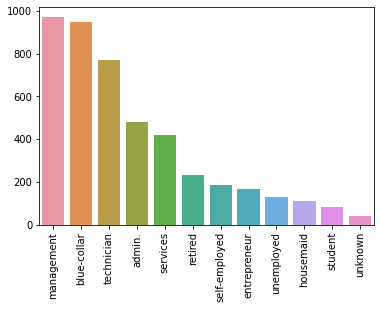

In [36]:
jobs = data_set['job']
valores = jobs.value_counts()
sns.barplot(x=valores.index, y=valores.values)
plt.xticks(rotation=90)

Criar uma coluna em um dataset

In [28]:
lista = []

for i in range(len(jobs)):
    if data_set['job'][i] == 'admin':
        lista.append('medio')
    elif data_set['job'][i] == 'blue-collar':
        lista.append('baixo')
    elif data_set['job'][i] == 'entrepreneur':
        lista.append('alto')
    elif data_set['job'][i] == 'housemaid':
        lista.append('baixo')
    elif data_set['job'][i] == 'management':
        lista.append('medio')
    elif data_set['job'][i] == 'retired':
        lista.append('baixo')
    elif data_set['job'][i] == 'self-employed':
        lista.append('medio')
    elif data_set['job'][i] == 'student':
        lista.append('alto')
    elif data_set['job'][i] == 'technician':
        lista.append('alto')
    elif data_set['job'][i] == 'unemployed':
        lista.append('baixo')
    elif data_set['job'][i] == 'unknow':
        lista.append('baixo')
    else:
        lista.append('baixo')

Unindo dois DataFrames 

In [29]:
df = pd.DataFrame(lista, columns=['technology_use'])
c = pd.concat([data_set,df], axis=1)

# Criando variavel dummy com a função lambda

'''
Expressões lambda - funções anônimas (não tem nome)

FUNÇÃO NORMAL:

  def funcao(arg1, arg2):
      return arg1*arg2

  var = funcao(arg1,arg2)

FUNÇÃO LAMBDA

  a = lambda arg1, arg2: arg1*arg2

'''

In [39]:
data_set['default_dummy'] = list(map(lambda x: 1 if x=='yes' else 0, data_set['default']))

Transformar todas as variaveis categóricas em dummy 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def converter_one_hot(coluna):
  encoder = OneHotEncoder()
  valores, categorias = data_set[coluna].factorize()
  converter_onehot = encoder.fit_transform(valores.reshape(-1,1))
  onehot = pd.DataFrame(list(converter_onehot.toarray()))
  return onehot


colunas = ['job', 'marital', 'education', 'default', 'housing',
          'loan', 'contact', 'month', 'poutcome', 'y', 'technology_use']

valor = []
for i in range(len(colunas)):
  auxiliar = converter_one_hot(colunas[i])
  valor.insert(i,auxiliar)

total = pd.DataFrame()
for i in range(len(colunas)):
  final = pd.DataFrame(valor[i])
  total = pd.concat([final, total], axis=1)
